**<h1 style="text-align: center;">Image Classification  Project</h1>**

## 👋🏼 **Introduction**

<p style="text-align: justify;">I am a data scientist for a company called Secure Cams. And it is building an application in which if you take pictures of gym equipments, it should be able to detect which equipment it is. The problem that currently the company is facing it there are many equipemnts in the gym which people have paid subscription for but they are not using it because they do not know what the equipment is and they do not know how ot use it. So, with this project the aim of my company is to build a deep leaning pipeline and implement this in their gym application. So that an user can take a picture of an equipment and will be able to find out what the equipment is and how to use it.</p>

## 🧿 **Objective**
 <p style="text-align: justify;">The objective of this project is that I will have to build a module which will try to classify the category of gym equipment. For this my company has given me a dataset which has images of many equipments which are divided into diffrent folders. So I will be using these images in the folders and building an accurate Deep Learning Model using Convolutional Neural Network. Firstly I will be going through the full image dataset and trying to remove the unwanted images with unsupported extensions. And then using these images I will be building a model. I will also be doing several experiments in order to improve the performance of the model. I will be including these test results in the I will check if our dataset is balanced and if there is a requirement to increase the dataset so that our model can learn better from the data. Then I will choose the best-performing model to build my final model with the best-suited parameters.
 </p>

**About the data**  
This dataset contains 12 columns. This data set is from Kaggle. You can [**click here**](https://www.kaggle.com/datasets/starsiwach/4-gym-equipment-types-classification-dataset) to view the dataset on kaggle.

## **Table of Content**

##### ⬇ [**Importing Libraries**](#library)
##### 📊 [**Importing Dataset**](#dataset)
##### 🗺️ [**Exploring the dataset**](#exploration)
##### 💭 [**My taughts on the dataset**](#thoughts)
##### ⚙️ [**Pre-processing the data**](#processing)
##### 🔧 [**Feature Engineering**](#feature)
##### 🗂️ [**Selecting the best model for our dataset**](#selection)
##### ✅ [**Assessing which gives us the best results**](#assess)
##### 🎛️ [**Hyper-Parameter Tuning**](#tuning)
##### 🏁 [**Final Model**](#Final)
##### 💡 [**Conclusion**](#conclusion)


## ***Let's begin....***

<a id='library'></a>
## ⬇ <span style="color: #20479b; font-weight: bold;">Importing Libraries</span>

I start by importing the necessary libraries for my Exploratory Data Analysis tasks in Python.

In [80]:
import  pandas as  pd
import os
import warnings
import    numpy as  np
import cv2
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import tensorflow as tf
import imghdr
warnings.filterwarnings("ignore", category=UserWarning, module="cv2")
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall, Precision, Accuracy 

In [81]:
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

<a id='dataset'></a>  

## 📊 <span style="color: #20479b; font-weight: bold;">Importing Dataset</span>

In [82]:
dtst_dir = '/Users/jasonjoelpinto/Documents/GitHub/python-datascience-projects/014. image_classification_project/dataset/Gym Data'
extensions = ['png','jpeg','jpg']

Here I have specified the data directory where I have saved my images in my local computer.
I have also created a list of extensions which I will be taking into consideration in this pipeline. I will be deleting everything else.
Let's check how many folders/categories are there in my directory.

In [89]:
os.listdir(dtst_dir)

['.DS_Store',
 'Recumbent Bike',
 'Home Machine',
 'Dumbells',
 'Elliptical Machine']

If we ignore the DS store which is the defaut masos folder. We can see that there are 4 folders. Which means that we have four types of equiments which we need to build a machine learning model from.

In [83]:
os.listdir(os.path.join(dtst_dir,'Recumbent Bike'))[:10]

['th11.jpg',
 'OIP.C2ZbX9ZGlRuIjUbe8fMJewHaHf.jpg',
 'OIP.KzuhaoewQnswx2XCpnYd1QHaHa.jpg',
 '_exercise_bike_nordictrack_commercial_vr21_recumbent_exercise_bike_2000x2000.jpg',
 'OIP.2GjM5otBzxkNdtm7iEmVrwHaGq2.jpg',
 'OIP.1Uim6l2OHqK8y5m0h5jubAHaHa.jpg',
 'OIP.Lv7SbVfUI5J5c2X1YgcN7wHaHa.jpg',
 'Recumbent-Bike-Marcy-NS-40502R-2__09389.1501001516.jpg',
 'OIP.dOGuZHUSrFeuZF28cuZ95gHaHa.jpg',
 'f4f2572d-3c0c-4079-820f-154935f3d66c_1.bfefaacbac800cfae8b76c2fd132d239.jpeg']

Here I am selecting first 10 image names in the recumbent Bike folder.

I have built the below code so that it can run though all the images and remove the images which do not support the extensions list that we have.

In [84]:
print(extensions)
from PIL import Image
for folder in os.listdir(dtst_dir):
    if folder == '.DS_Store':
        continue
    folder_dir = os.path.join(dtst_dir, folder)
    for file in  os.listdir(folder_dir):
        file_dir = os.path.join(folder_dir, file) 
        try:
            extension = imghdr.what(file_dir)
            # print(extension)
            # print(file_dir)
            # if extension == 'png':
            #     with Image.open(file_path) as img:
            #         img.save(file_path)
                    
            image = cv2.imread(file_dir)
            
            if extension not in extensions:
                print(f'Extension {extension} not supported, hence will be deleted >> {file_dir}')
                os.remove(file_dir)
        except Exception as exp:
            print(f'Extension error for {extension} >> {file_dir}')

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, module='cv2')

['png', 'jpeg', 'jpg']


In [85]:
image

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]]

As you can see there an image is saved in array. It will be in a matrix format. Let's check the shape of image and see.

In [86]:
image.shape

(156, 156, 3)

As you can see here it has three values. the first 156 represents the height of the image. Second number represents the width of the image. And the third one is the color. Since we have a colored images it will be stored in 3 channels that is red green blue.

We can also check the type of the datatype for the variable image.

In [87]:
type(image)

numpy.ndarray

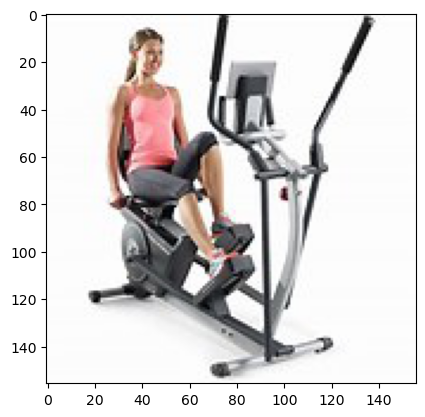

In [88]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [90]:
dt = tf.keras.utils.image_dataset_from_directory(dtst_dir)

Found 792 files belonging to 4 classes.


<a id='exploration'></a>
## 🗺️ <span style="color: #20479b; font-weight: bold;">Exploring the dataset</span>

**Note:**
For EDA I will be using the main data. Once data is normalized, I will be splitting it into `train` and `test` split.
1. Screening the images in the pipeline one by one takes a lot of time. Hence we will be looking at only few of the images and making sure that it correctly maintained.
2. I will be splitting the data after normalization because otherwise, the three datasets won't be even. 

Here one disadvantage that I saw is that we cannot view the image randomly. We need a iterator with loads the data in batches and then we can load the data. Let's view some of the images.

In [91]:
dt_itr = dt.as_numpy_iterator()
dt_itr

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x3a931d490>)

In [92]:
btc_load = dt_itr.next()
len(btc_load)

2

Here if you see the length of the batch is 2. That is because it will contain images and the label of the image seperately. Hence 2. 
Now let us check the shape of 0th position of the batch.

In [93]:
btc_load[0].shape

(32, 256, 256, 3)

Here is you see there are 4 values. In this 32 stands for the batch size, 256 is the width of the images, another 256 stands for the height of the image and 3 means color value. In this case since the pictures are colored it is 3 (rgb).

In [94]:
btc_load[1]

array([1, 1, 3, 2, 1, 1, 0, 2, 3, 0, 3, 1, 0, 1, 2, 0, 0, 3, 1, 1, 3, 0,
       0, 1, 1, 2, 1, 2, 0, 3, 3, 3], dtype=int32)

These are the labels with numbers indicating different classes.

In [95]:
eq_class = dt.class_names
eq_class

['Dumbells', 'Elliptical Machine', 'Home Machine', 'Recumbent Bike']

Now as per the class order,
1 = Dumbells
2 = Elliptical Machine
3 = Home Machine
4 = Recumbent Bike

Let's check if it is in order before we proceed. To check this I will plot 4 images and check

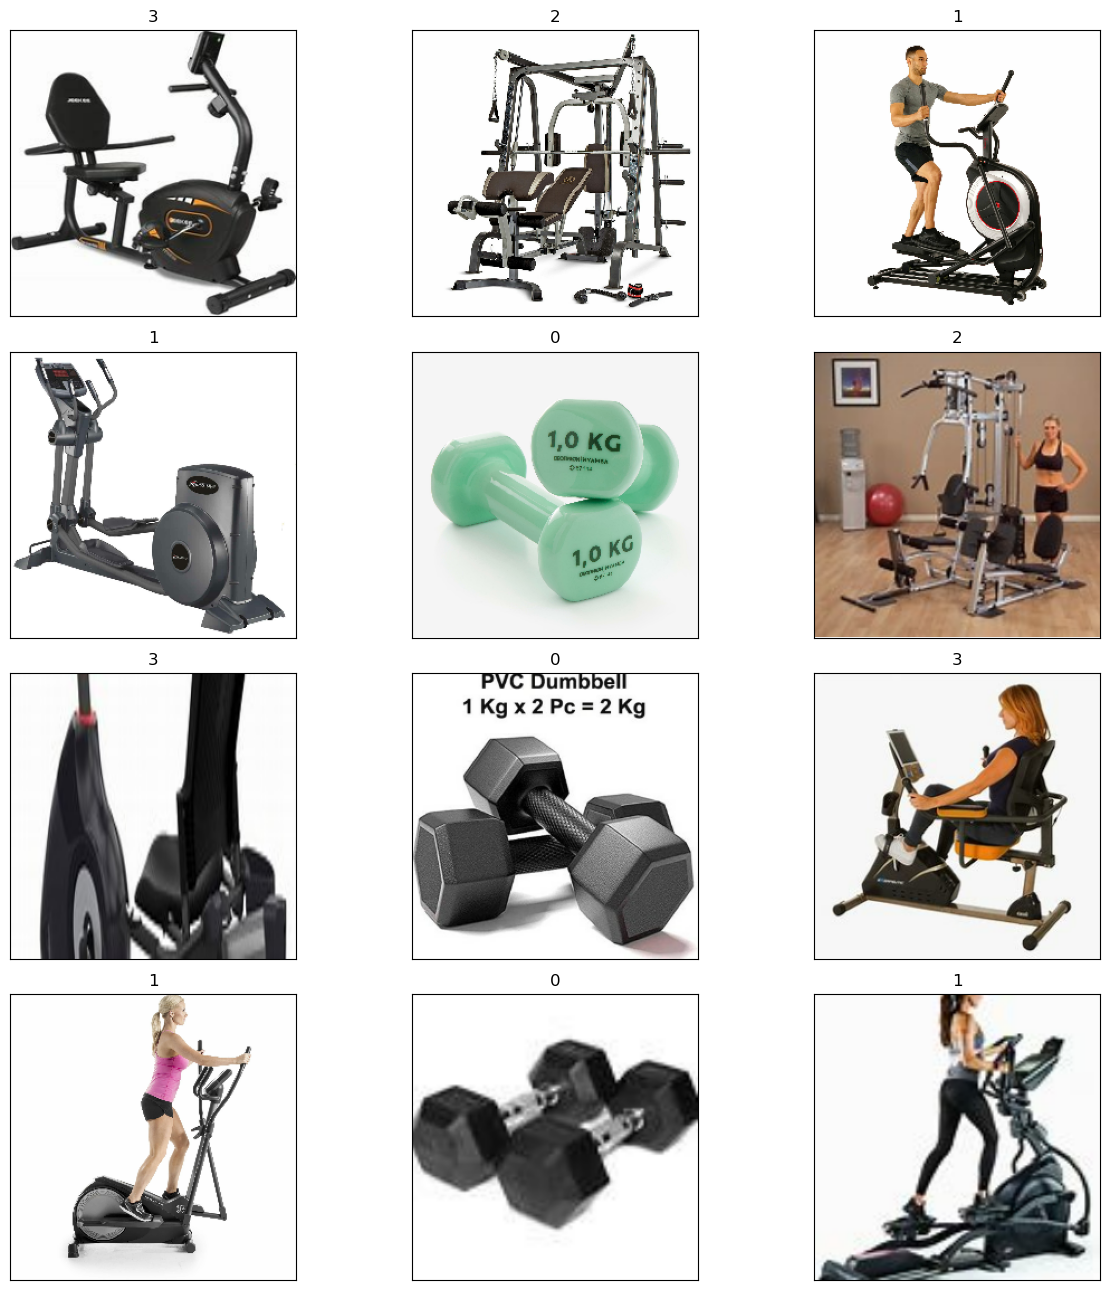

In [96]:
fig, impt = plt.subplots(nrows=4, ncols=3, figsize= (13,13))

impt = impt.flatten()

for i, img in enumerate(btc_load[0][2:14]):
    impt[i].imshow(img.astype(int))
    impt[i].title.set_text(btc_load[1][2:14][i])
    impt[i].set_xticks([])
    impt[i].set_yticks([])    

plt.tight_layout()
plt.show()

As you can see in these above pictures the images are correctly catergorized.

<a id='thoughts'></a>
## 💭 <span style="color: #20479b; font-weight: bold;">My thoughts on the dataset</span>

As per my initial Data Exploration,
- I can see that the dataset big enough to build a ML model.
- This dataset consited of unnessary files which wouldn't be supported, hence I have removed it.
- There is one particular file which is giving me the error of incorrect srgb profile maintainance. I will be trying to find which file is it and deleting that file.
- We have loaded the data using keras image from directory function. This has made it very easy.
- The data in maintained in two indexes. Index 0 containes the image itself and index 1 contains the labels for the corresponding image.
- the sRGB error that we are getting can be ignored but having said that it can have a impact on the model as well hence I will be trying to remove it.
- It is difficult to check the image data here in the pipeline, hence I have validated the data in my file explorer as well.
- As I will have to train the model and then later test it, I will be splitting our dataset into two parts. Training, Validation and Testing split.


Evaluation Metrics:
For this dataset I will be using, Accuracy, precision, F1 are the evaluation metrics.



Considering all these above points, I will be following the below steps to 

**⚙️ pre-process**
1. 🔍 Find the images which are giving you issues.
2. 🗑️ Delete all the images that have issues with the sRGB profile.
<!-- 4. ➗ Spliting our main datset into two parts, one part for training and another for testing dataframe
    - Doing it before testing or 
    - to avoid data Scalling and oversampling. -->

**🔧 feature Engineer**
1. ⚖️ Scalling the numerical and categorical labels

<!-- 2. 📈 Oversampling the data for stroke = 1, Because of two main reasons.
    - Our focus is on stroke detection and data for people who have stroke is very less.
    - We do not have to worry about data size as well here, since it's not very huge. -->

<a id='processing' ></a>
## ⚙️ <span style="color: #20479b; font-weight: bold;">Pre-processing the data</span>


**1. ❎ Scaling the data**

since the data is not loaded at once, and it get loaded which processing we cannot scale the whole dataset at once. Hence I will be creating a lamda function to scale the lamda function on load and then we will check if it's working as expected..

In [97]:
scld_dt = dt.map(lambda pictures, label: (pictures/255, label))

Now, next when I call function to load a batch it should automatically scale the dataset and load it for us. And to verify it we will be checking the max and min value of the loaded dataset.

In [98]:
scld_btc = scld_dt.as_numpy_iterator().next()

In [99]:
print(f'Min Values :{scld_btc[0].min()}')
print(f'Max Values :{scld_btc[0].max ()}')

Min Values :0.0
Max Values :1.0


Hence we can confirm that our data is been successfully scaled.

Now just to check that our image data is preserved even when we scaled the data let's load the pictures again and check if any image data is lost.

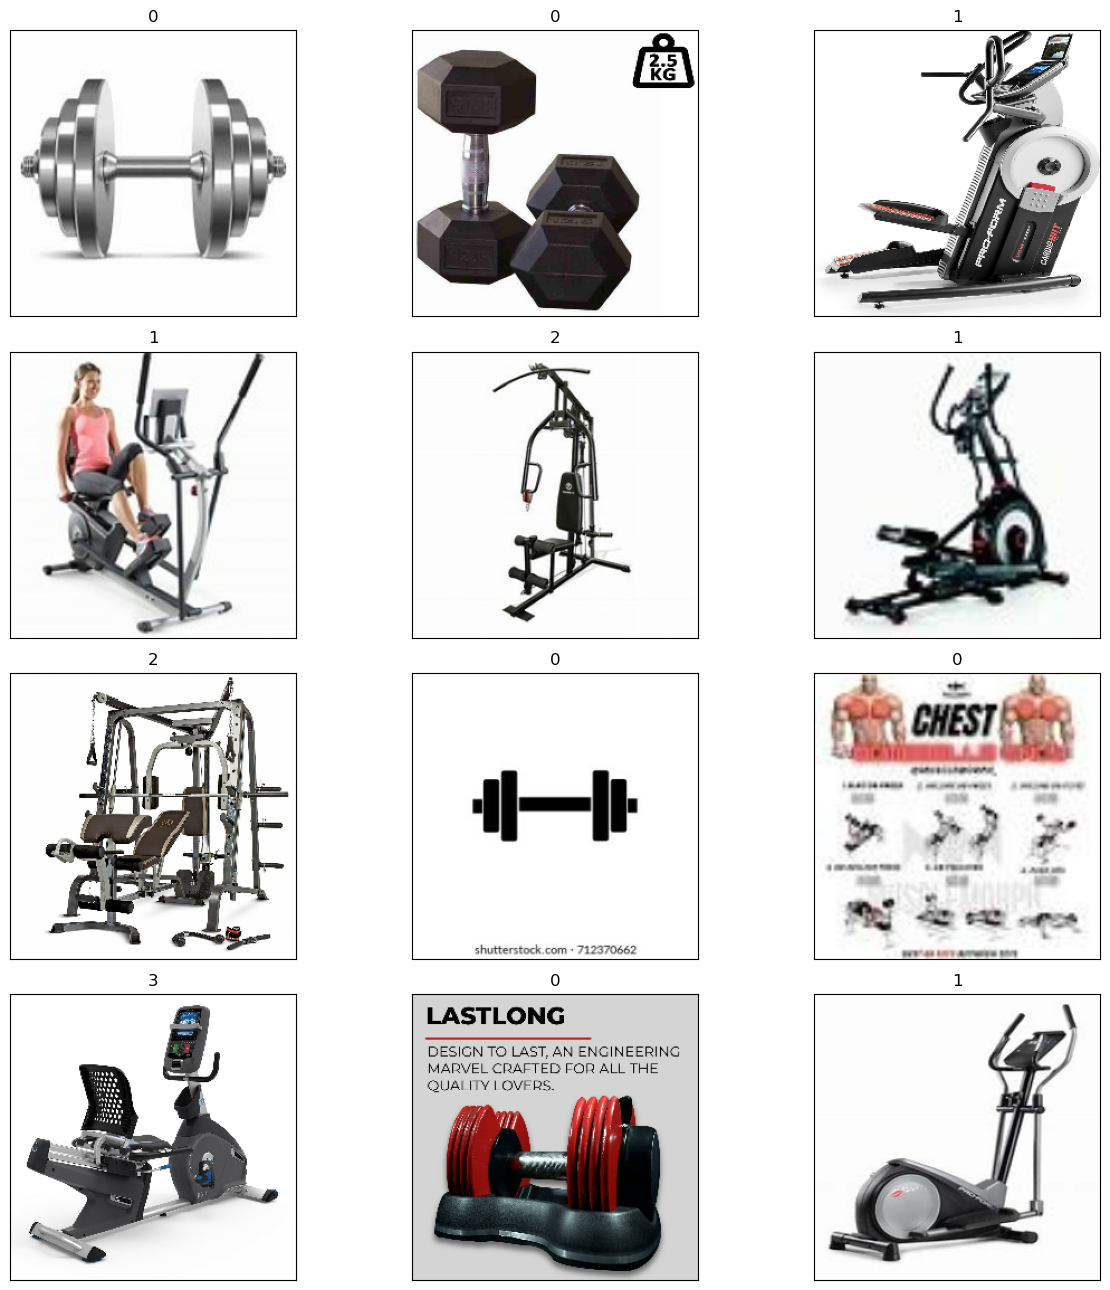

In [100]:
fig, impt = plt.subplots(nrows=4, ncols=3, figsize= (13,13))

impt = impt.flatten()

for i, img in enumerate(scld_btc[0][2:14]):
    impt[i].imshow(img)
    impt[i].title.set_text(scld_btc[1][2:14][i])
    impt[i].set_xticks([])
    impt[i].set_yticks([])    

plt.tight_layout()
plt.show()

**2. ❎ Splitting the data**

Now that we have scaled the data, we can split the dataset.

In [102]:
len(dt)

25

So, in total there are 25 batches. We can deviled them 7:2:1 ratio.

In [101]:
train_btc_size = 17
validation_btc_size = 5
test_btc_size= 3

In [103]:
train_btc_dt = scld_dt.take(train_btc_size)
validation_btc_dt = scld_dt.skip(train_btc_size).take(validation_btc_size)
test_btc_dt = scld_dt.skip(train_btc_size+validation_btc_size).take(test_btc_size)

In [104]:
print(f'Total batches in Train      :{len(train_btc_dt)}')
print(f'Total batches in Validation :{len(validation_btc_dt)}')
print(f'Total batches in Test       :{len(test_btc_dt)}')

Total batches in Train      :17
Total batches in Validation :5
Total batches in Test       :3


<a id='feature' ></a>
## 🔧 <span style="color: #20479b; font-weight: bold;">Feature Engineering</span>


<a id='selection'></a>
## 🗂️ <span style="color: #20479b; font-weight: bold;">Experimental Section</span>

So I have 10 different configurations and choose the best out of these

<style>
  table {
    width: 100%;
    border-collapse: collapse;
    border: 1px solid #ddd;
    font-family: Arial, sans-serif;
  }
  th, td {
    padding: 12px;
    text-align: left;
    border-bottom: 1px solid #ddd;
  }
  th {
    background-color: #03bafc;
    color: #000;
  }
  tr:nth-child(even) {
    background-color: #2e2e2e;
  }
  tr:hover {
    background-color: #2d3f47; /* Light tint of blue for hover effect */
  }
  td:first-child {
    font-weight: bold;
  }
   tr.mdl_config8 {
    background-color: #1a5229; /* Dark light green */
  } 
  .mdl_config8 {
    background-color: #1a5229; /* Darker green for note */
    padding: 8px;
    font-style: italic;

  }
</style>

<table>
  <thead>
    <tr>
      <th>Model Config</th>
      <th>Layers</th>
      <th>Validation Accuracy</th>
      <th>Observations</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b>mdl_config1</b></td>
      <td>Flatten(input_shape=(256,256,3))<br>Dense(4, activation='softmax')</td>
      <td>0.8375</td>
      <td>The accuracy was very low and it was fluctuating a lot. Hence, I will add one more dense hidden layer to the model.</td>
    </tr>
    <tr>
      <td><b>mdl_config2</b></td>
      <td>Flatten(input_shape=(256,256,3))<br>Dense(16, activation='relu')<br>Dense(4, activation='softmax')</td>
      <td>0.4312</td>
      <td>With the additional layer with 16 neurons, the accuracy dipped to 43%. I wanted to check if making the network more complex would help the model predict better.</td>
    </tr>
    <tr>
      <td><b>mdl_config3</b></td>
      <td>Flatten(input_shape=(256,256,3))<br>Dense(16, activation='relu')<br>tf.keras.layers.Dense(32, activation='relu')<br>Dense(4, activation='softmax')</td>
      <td>0.63125</td>
      <td>With the addition of another layer for 16 neurons, the accuracy increased by approximaterly 20%. Since these are images I wanted to check addition of convolutional and maxpooling layer will help, I will also increase the neurons for the dense layer</td>
    </tr>
    <tr>
      <td><b>mdl_config4</b></td>
      <td>Conv2D(16, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Flatten()<br>Dense(256, activation='relu')<br>Dense(4, activation='softmax')</td>
      <td>0.93125</td>
      <td>Due to the convlutional layers it was able to read the images better. It was able to extract various features from the dataset. The accuracy has not increased to 93. Now I want to check it adding one more layer will help increase the accuracy.</td>
    </tr>
    <tr>
      <td><b>mdl_config5</b></td>
      <td>Conv2D(16, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Conv2D(32, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Flatten()<br>Dense(256, activation='relu')<br>Dense(4, activation='softmax')</td>
      <td>0.93750</td>
      <td>There was no significant increace in the accuracy after adding another convolutional layer. But it was still slightly better than the previous configuration. Just to experiment I want to add another layer of convolution with more neurons and see if it increases the performance.</td>
    </tr>
    <tr>
      <td><b>mdl_config6</b></td>
      <td>Conv2D(16, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Conv2D(32, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Conv2D(64, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Flatten()<br>Dense(256, activation='relu')<br>Dense(4, activation='softmax')</td>
      <td>0.99375</td>
      <td>This was a huge improvement for me. The accuracy went to 99. The accuracy is fluctuating a little bit though. I do not want the model to overfit the train dataset hence I will experiment adding Early Stopping and see how it impacts</td>
    </tr>
    <tr>
      <td><b>mdl_config7</b></td>
      <td>Conv2D(16, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Conv2D(32, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Conv2D(64, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Flatten()<br>Dense(256, activation='relu')<br>Dense(4, activation='softmax')<br>++EarlyStopping</td>
      <td>0.996324</td>
      <td>The accuracy has improved slightly and the accuracy curve is also much better. To avoid further overfit I will add Dropout layer see how it impacts</td>
    <tr class="mdl_config8">
      <td><b>👑 mdl_config8</b></td>
      <td>Conv2D(16, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Conv2D(32, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Conv2D(64, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Flatten()<br>Dense(256, activation='relu')<br>Dropout(0.5)<br>Dense(4, activation='softmax')<br>++EarlyStopping</td>
      <td>0.98750</td>
      <td class="observations">The accuracy has decreased slightly, this may be because it was overfitting the data earlier. Let me add batch normalization and check if it will improve the accuracy.
      <br><br><b>Note:</b> I have chosen this even if model 7 has better results because this model has both Early Stopping and Dropout, and even with that, it was able to score 0.98750 without overfitting the train data, which is great!!</td>
    </tr>
    <tr>
      <td><b>mdl_config9</b></td>
      <td>Conv2D(16, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Conv2D(32, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Conv2D(64, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Flatten()<br>Dense(256, activation='relu')<br>BatchNormalization()<br>Dropout(0.5)<br>Dense(4, activation='softmax')<br>++EarlyStopping</td>
      <td>0.98750</td>
      <td>The accuracy is still the same. Now I want to check if changing the optimizers to sgd from adam will help increase the acccuracy</td>
    </tr>
    <tr>
      <td><b>mdl_config10</b></td>
      <td>Conv2D(16, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Conv2D(32, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Conv2D(64, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Flatten()<br>Dense(256, activation='relu')<br>BatchNormalization()<br>Dropout(0.5)<br>Dense(4, activation='softmax')<br>++EarlyStopping</td>
      <td>0.98750</td>
      <td>With sgd the accuracy dropped to 72, and the accuracy fluctuates alot. So I will be going back to the adam optimizer. And I will try increasing the learning rate</td>
    </tr>
    <tr>
      <td><b>mdl_config11</b></td>
      <td>Conv2D(16, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Conv2D(32, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Conv2D(64, (2,2), 1, activation='relu', input_shape=(256,256,3))<br>MaxPooling2D()<br>Flatten()<br>Dense(256, activation='relu')<br>BatchNormalization()<br>Dropout(0.5)<br>Dense(4, activation='softmax')<br>++EarlyStopping</td>
      <td>0.98750</td>
      <td>With increase in learning rate thethe accuracy fluctuates even more.</td>
    </tr>
  </tbody>
</table>


<a id='Final'></a>
## 🏁 <span style="color: #20479b; font-weight: bold;">Final Model</span>

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 485ms/step - accuracy: 0.3374 - loss: 3.0945 - val_accuracy: 0.5875 - val_loss: 1.0055
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 664ms/step - accuracy: 0.6039 - loss: 0.9714 - val_accuracy: 0.7625 - val_loss: 0.6488
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 579ms/step - accuracy: 0.7655 - loss: 0.6954 - val_accuracy: 0.8438 - val_loss: 0.5021
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 714ms/step - accuracy: 0.8681 - loss: 0.4046 - val_accuracy: 0.9062 - val_loss: 0.3013
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 543ms/step - accuracy: 0.9221 - loss: 0.2465 - val_accuracy: 0.9375 - val_loss: 0.2864
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 616ms/step - accuracy: 0.9697 - loss: 0.1362 - val_accuracy: 0.9688 - val_loss: 0.2068
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 637ms/step - accuracy: 0.9860 - loss: 0.0959 - val_accuracy: 0.9750 - val_loss: 0.1191
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 654ms/step - accuracy: 0.9724 - loss: 0.0912 - val_accu

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)              │ (None, 255, 255, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 126, 126, 32)   │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 62, 62, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 256)            │    15,745,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,270,558 (180.32 MB)

 Trainable params: 15,756,852 (60.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,513,706 (120.22 MB)

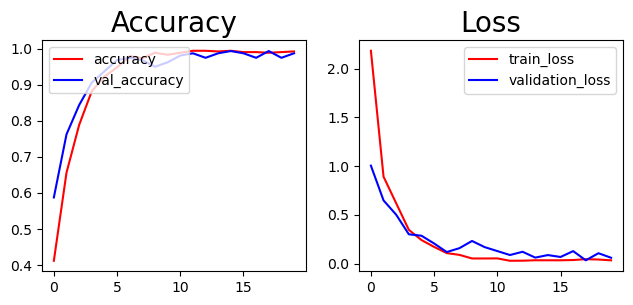

In [105]:
mdl_config8 = Sequential([
    tf.keras.layers.Conv2D(16, (2,2), 1, activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (2,2), 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (2,2), 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

mdl_config8.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='validation_loss',mode='max',patience=4, restore_best_weights=True)
hist_config8 = mdl_config8.fit(train_btc_dt, epochs=20, validation_data=validation_btc_dt, callbacks=[early_stop])
print('')
print('=====================================================================================================')
print('')

mdl_config8.summary()

fig, (acc, lss) = plt.subplots(1, 2, figsize=(7.5, 3))

acc.plot(hist_config8.history['accuracy'], color='red', label='accuracy')
acc.plot(hist_config8.history['val_accuracy'], color='blue', label='val_accuracy')
acc.set_title('Accuracy', fontsize=20)
acc.legend(loc="upper left")

lss.plot(hist_config8.history['loss'], color='red', label='train_loss')
lss.plot(hist_config8.history['val_loss'], color='blue', label='validation_loss')
lss.set_title('Loss', fontsize=20)
lss.legend(loc="upper right")

plt.show()

<a id='Evaluation'></a>
## 💡 <span style="color: #20479b; font-weight: bold;"> Model Evaluation</span>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Precision : 1.0
Recall    : 1.0
Accuracy  : 1.0


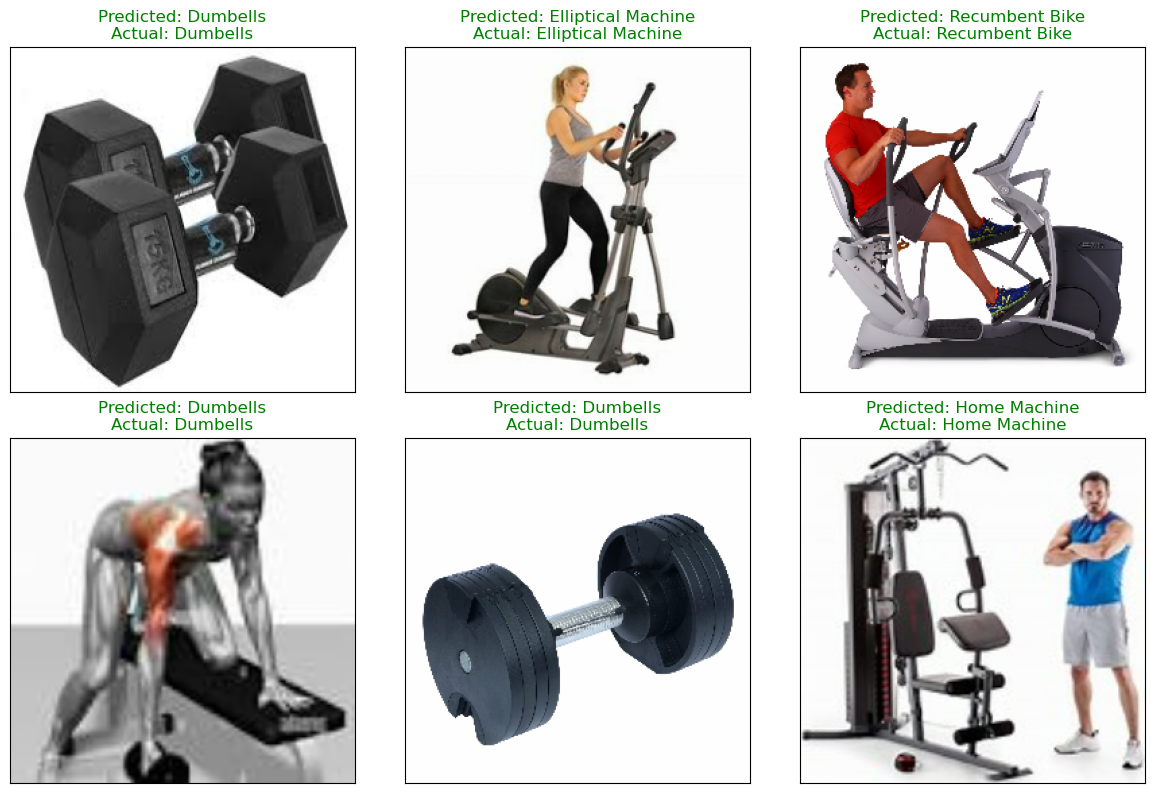

In [154]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

recl_lst = []
prcn_lst = []
acry_lst = []

imgs = []
tarpreds = []
tars = []

for btc in test_btc_dt.as_numpy_iterator():
    img, tar = btc
    tarpred = mdl_config8.predict(img)
    tarpred = tarpred.argmax(axis=1)
    recln = recall_score(tar, tarpred, average='macro')
    prcnn = precision_score(tar, tarpred, average='macro')
    acryn = accuracy_score(tar, tarpred)
    prcn_lst.append(prcnn)
    recl_lst.append(recln)
    acry_lst.append(acryn)

    # Append images, predictions, and ground truths for visualization
    imgs.extend(img)
    tarpreds.extend(tarpred)
    tars.extend(tar)

    # Break the loop if enough images are collected
    if len(imgs) >= 6:
        break

print(f'Precision : {sum(prcn_lst)/len(prcn_lst)}')
print(f'Recall    : {sum(recl_lst)/len(recl_lst)}')
print(f'Accuracy  : {sum(acry_lst)/len(acry_lst)}')

fig, am = plt.subplots(2, 3, figsize=(12, 8))
am = am.ravel()

for i,img in enumerate(imgs):
    # Plot image
    am[i].imshow(img)
    am[i].set_xticks([])
    am[i].set_yticks([])
    
    if tarpreds[i] == tar[i]:
        ttl = 'green'
    else:
        ttl = 'red'
    
    am[i].set_title(f'Predicted: {eq_class[tarpreds[i]]}\nActual: {eq_class[tars[i]]}', color=ttl)

    if i >=5:
        break


plt.tight_layout()
plt.show()

As we can see in the above plot, we were able to get very good scored and out of the 6 images we were able to predict most of it.

<a id='conclusion'></a>
## 💡 <span style="color: #20479b; font-weight: bold;">Conclusion</span>